In [20]:
import pandas as pd

### This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.
Fields include
Rank - Ranking of overall sales
Name - The games name
Platform - Platform of the games release (i.e. PC,PS4, etc.)
Year - Year of the game's release
Genre - Genre of the game
Publisher - Publisher of the game
NA_Sales - Sales in North America (in millions)
EU_Sales - Sales in Europe (in millions)
JP_Sales - Sales in Japan (in millions)
Other_Sales - Sales in the rest of the world (in millions)
Global_Sales - Total worldwide sales.

In [21]:
df = pd.read_csv('vgsales.csv')

In [22]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [23]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### The dataframe show us Sales on different areas of each games

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [25]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
#df = df.fillna(0)

## Game sales on different platforms, companys, and types

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

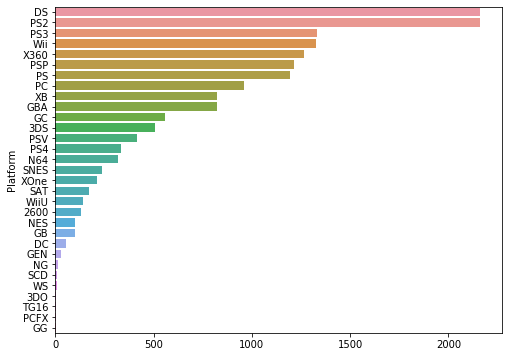

In [27]:
platform_genre = pd.crosstab(df.Platform, df.Genre)
platformTotal = platform_genre.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(y = platformTotal.index, x = platformTotal.values, orient='h')
plt.ylabel = 'Platform'
plt.xlabel = 'Amount'
plt.show()

### We can see from the plot that DS(Nintendo) and PS2(Sony) have the largest game amount

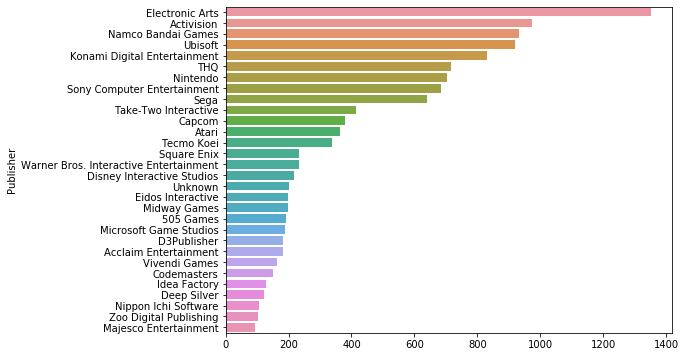

In [28]:
Publisher_platform = pd.crosstab(df.Publisher, df.Platform)
publisherTotal = Publisher_platform.sum(axis=1).sort_values(ascending=False)
publisherTotal = publisherTotal.head(30)
plt.figure(figsize=(8,6))
sns.barplot(y = publisherTotal.index, x = publisherTotal.values, orient='h')
plt.ylabel = 'Publisher'
plt.xlabel = 'Amount'
plt.show()

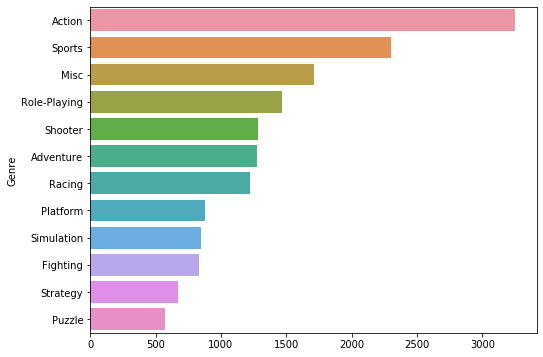

In [29]:
Genre_Year = pd.crosstab(df.Genre, df.Year)
genreTotal = Genre_Year.sum(axis=1).sort_values(ascending=False)
genreTotal = genreTotal.head(30)
plt.figure(figsize=(8,6))
sns.barplot(y = genreTotal.index, x = genreTotal.values, orient='h')
plt.ylabel = 'Type'
plt.xlabel = 'Amount'
plt.show()

### The plot shows that Action game is the most popular type in game publishers

## Games sales sort by year

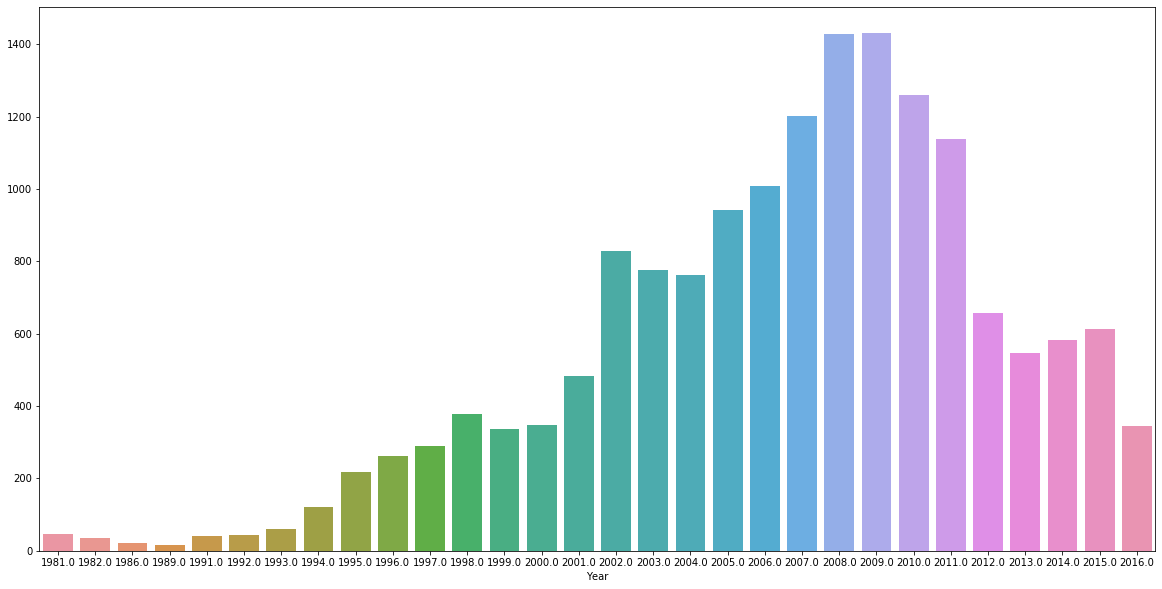

In [30]:
Year_Genre = pd.crosstab(df.Year, df.Genre)
YearTotal = Year_Genre.sum(axis=1).sort_values(ascending=False)
YearTotal = YearTotal.head(30)
plt.figure(figsize=(20,10))
sns.barplot(y = YearTotal.values, x = YearTotal.index, orient=None)
plt.ylabel = 'Type'
plt.xlabel = 'Amount'
plt.show()

In [31]:
Y_G = Year_Genre.drop(labels=[2016,2017,2020],axis=0)

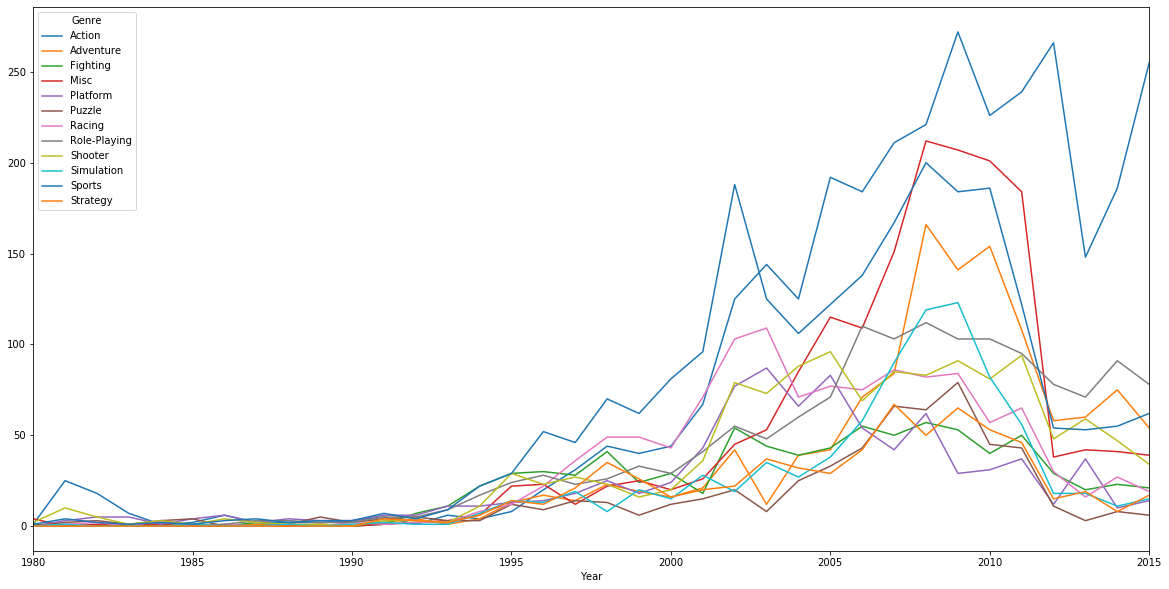

In [32]:
Y_G.plot(figsize=(20, 10))

## Video game sales in terms of genre and platform

In [16]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [33]:
xaction=df[df.Genre=="Action"]
xsports=df[df.Genre=="Sports"]
xmisc=df[df.Genre=="Misc"]
xrole=df[df.Genre=="Role-Playing"]
xshooter=df[df.Genre=="Shooter"]
xadventure=df[df.Genre=="Adventure"]
xrace=df[df.Genre=="Racing"]
xplatform=df[df.Genre=="Platform"]
xsimulation=df[df.Genre=="Simulation"]
xfight=df[df.Genre=="Fighting"]
xstrategy=df[df.Genre=="Strategy"]
xpuzzle=df[df.Genre=="Puzzle"]

In [34]:
trace1 = go.Histogram(
    x=xaction.Platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.Platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.Platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.Platform,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.Platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.Platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.Platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.Platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Prediction of games sales on next year

In [35]:
YearTotal_2 = Year_Genre.sum(axis=1).drop(labels=[2016,2017,2020],axis=0)

E:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                   36
Model:                            GLM   Df Residuals:                       34
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.4
Date:                Thu, 30 Apr 2020   Deviance:                       5482.7
Time:                        05:04:18   Pearson chi2:                 5.06e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.5383      1.964    -93.948      0.0

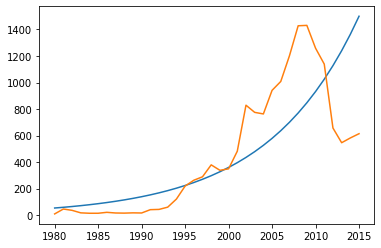

In [36]:
import statsmodels.api as sm
X=pd.DataFrame(YearTotal_2.index)
Y=pd.DataFrame(YearTotal_2.values)
X=sm.add_constant(X)
model=sm.GLM(Y, X, family=sm.families.Poisson())
results=model.fit()
print(results.summary())
    
pred=results.predict(X)
plt.plot(YearTotal_2.index,pred)
plt.plot(YearTotal_2.index,YearTotal_2.values)
plt.show()